# Градиентный спуск и его модификации для решения задач оптимизации 

## На прошлой лекции

- Постановки задач оптимизации
- Приложения и моделирование
- Простейшие методы поиска приближённого решения
- Введение в градиентный спуск

## План на сегодня

- Свойства градиентного спуска
- Скорость сходимости
- Число обусловленности
- Метод тяжёлого шарика
- Сравнение методов

## Градиентный спуск: напоминание

- Пересчёт выполняется по формуле

$$ x_{k+1} = x_k - \alpha_k f'(x_k), $$

где $\alpha > 0$ - размер шага (learning rate)

- Важное свойство функций - липшицевость градиента

$$ || f'(x) - f'(y) ||_2 \leq L || x - y ||_2,$$

где $L > 0$ - константа Липшица

- Если функция обладает Липшицевым градиентом, то можно показать, что выполнено неравенство

$$ f(y) \leq f(x) + \langle f'(x), y - x \rangle + \frac{L}{2} ||y - x ||_2^2. $$

Это значит в каждой точке существует квадратичная оценка сверху на всю функцию!

- Правая часть - квадратичная функция с единичной матрицей. Следовательно, стационарная точка будет минимумом, который можно найти
- Градиент правой части

 $$ f'(x) + L(y - x) $$
 
- Условие стационарности

$$ f'(x) + L(y - x) = 0, \qquad y = x - \frac{1}{L} f'(x) $$

- Получили градиентный спуск с шагом $\frac{1}{L}$
- Можно показать, что это оптимальный постоянный шаг
- Более продвинутые методы используют **локальную** липшицевость. Это позволяет
    - оценивать шаг адаптивно и сходиться быстрее
    - не оценивать $L$ глобально

## Какие бывают скорости сходимости?

_1._ Сублинейная

$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$

где $\alpha < 0$ и $ 0 < C < \infty$

_2._ Линейная (геометрическая прогрессия)

$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$

где $q \in (0, 1)$ и $ 0 < C < \infty$

_3._ Сверхлинейная 

$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^p}, 
$$

где $q \in (0, 1)$, $ 0 < C < \infty$ и $p > 1$

_4._ Квадратичная

$$
\| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2, \qquad \text{или} \qquad \| x_{k+1} - x^* \|_2 \leq C q^{2^k}
$$

где $q \in (0, 1)$ и $ 0 < C < \infty$

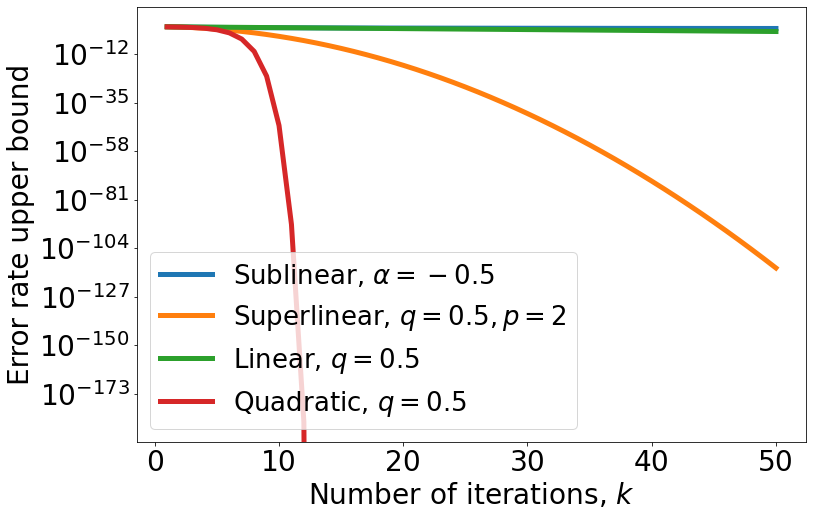

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
C = 10
alpha = -0.5
q = 0.9
num_iter = 50
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$", linewidth=5)
plt.semilogy(np.arange(1, num_iter+1), superlinear, linewidth=5,
             label=r"Superlinear, $q = 0.5, p=2$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$", linewidth=5)
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$", linewidth=5)
plt.xlabel("Number of iterations, $k$", fontsize=28)
plt.ylabel("Error rate upper bound", fontsize=28)
plt.legend(loc="best", fontsize=26)
plt.xticks(fontsize = 28)
_ = plt.yticks(fontsize = 28)

### Как может сходиться градиентный спуск?

- Важное определение: выпуклая функция - это функция, для которой выполнено для любых $x, y$

$$ f(\alpha x + (1 - \alpha)y ) \leq \alpha f(x) + (1 - \alpha) f(y), \quad \alpha \in [0, 1] $$

Геометрически это означает, что функция похожа на параболу, то есть отрезок, который соединяет точки на графике лежит выше графика функции между этими точками.

- Для выпуклых функций с Липшицевым градиентном - сублинейная сходимость

$$ f(x_k) - f^* \leq \frac{L||x^* - x_0||^2_2}{k+4}, $$

- Для выпуклых функций, таких что $\mu\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$ - линейная сходимость

$$ \| x_k - x^*\|_2 \leq \|x_0 - x^*\|_2 q^k, \qquad q = \max(|1 - \alpha \mu|, |1 - \alpha L|) < 1, $$

$q^* = \dfrac{L - \mu}{L + \mu}$ при $\alpha^* = \dfrac{2}{L + \mu}$

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def grad_descent(f, grad, x0, num_iter, eps, alpha):
    x = x0.copy()
    conv = [x]
    for i in range(num_iter):
        h = -grad(x)
        if np.linalg.norm(h) < eps:
            break
        x = x + alpha * h
        conv.append(x)
    return x, conv

In [103]:
np.random.seed(42)
n = 4
# n = 100
A = np.random.randn(n, n)
A = A.T.dot(A)
x_true = np.random.randn(n)
b = A.dot(x_true)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad = lambda x: A.dot(x) - b
A_eigvals = np.linalg.eigvalsh(A)
L = np.max(A_eigvals)
mu = np.min(A_eigvals)
q = (L - mu) / (L + mu)
print(L, mu)
print("Condition number = {}".format(L / mu))

9.483870720552407 0.11672407542832913
Condition number = 81.25033919309722


In [104]:
x0 = np.random.randn(n)
max_iter = 500
tol = 1e-6

Text(0, 0.5, 'Gradient norm')

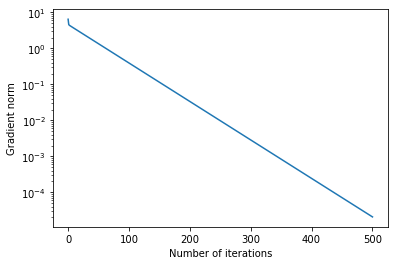

In [105]:
_, conv = grad_descent(f, grad, x0, max_iter, tol, 2. / (L + mu))
plt.semilogy([np.linalg.norm(grad(x)) for x in conv], label="GD convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Gradient norm")

Text(0.5, 0, 'Number of iterations')

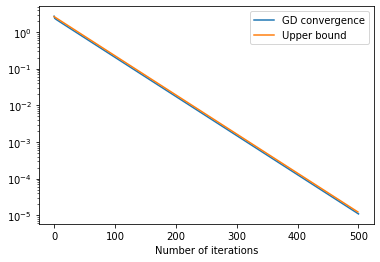

In [106]:
plt.semilogy([np.linalg.norm(x_true - x) for x in conv], label="GD convergence")
plt.semilogy([np.linalg.norm(x0 - x_true) * q**i for i in range(1, max_iter+1)], label="Upper bound")
plt.legend()
plt.xlabel("Number of iterations")

## Выводы

- Сходимость сильно зависит от неизотропности линий уровня целевой функции 
- Выбор шага может сильно влиять на сходимость
- Для невыпуклых функций большой шаг может приводить к избеганию промежуточных локальных минимумов
- Базовый метод, на основе которого построили более быстрые алгоритмы

## Метод тяжёлого шарика (Б.Т. Поляк, 1964)

- Для квадратичной целевой функции зигзагообразное поведение градиентного спуска обусловлено неоднородностью направлений
- Давайте учитывать предыдущие направления для поиска новой точки
- Метод тяжёлого шарика

$$
x_{k+1} = x_k - \alpha_k f'(x_k) + {\color{red}{\beta_k(x_k - x_{k-1})}}
$$

- Помимо параметра шага вдоль антиградиента $\alpha_k$ появился ещё один параметр $\beta_k$

### Сравнение градиентного спуска и метода тяжёлого шарика

Картинка из презентаций к курсу ELE538 в Принстоне 

<img src="./heavy_ball.png" width=600 align="center">

### Сходимость

Пусть $f$ выпукла с Липшицевым градиентом и $\mu\mathbf{I} \preceq f''(x) \preceq L\mathbf{I}$. Тогда для 

$$
\alpha_k = \frac{4}{(\sqrt{L} + \sqrt{\mu})^2}
$$ 

и 

$$
\beta_k = \max(|1 - \sqrt{\alpha_k L}|^2, |1 - \sqrt{\alpha_k \mu}|^2)
$$ 

справедлива следующая оценка сходимости

$$ 
\left\| \begin{bmatrix} x_{k+1} - x^* \\ x_k - x^* \end{bmatrix} \right\|_2
\leq 
\left( \frac{\sqrt{\kappa} - 1}{\sqrt{\kappa} + 1} \right)^k \left \|
\begin{bmatrix} x_1 - x^* \\ x_0 - x^* \end{bmatrix}
\right \|_2
$$

- $\kappa = \frac{L}{\mu}$

- Наличие $\sqrt{\kappa}$ в факторе $q$ существенно улучшает теоретическую оценку на скорость сходимости!

In [107]:
def heavy_ball(f, grad, x0, num_iter, eps, alpha, beta):
    x = x0.copy()
    conv = [x]
    prev_x = None
    for i in range(num_iter):
        h = -grad(x)
        if np.linalg.norm(h) < eps:
            break
        if prev_x is None:
            prev_x = x.copy()
            x = x + alpha * h
        else:
            x, prev_x = x + alpha * h + beta * (x - prev_x), x
            
        conv.append(x)
    return x, conv

In [108]:
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2 
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, 
                      (1 - np.sqrt(alpha_opt * mu))**2)
print(alpha_opt, beta_opt)
beta_test = 0.9
max_iter = 5000
_, conv_opt_hb = heavy_ball(f, grad, x0, max_iter, tol, alpha_opt, beta_opt)
_, conv_test_hb = heavy_ball(f, grad, x0, max_iter, tol, 1. / L, beta_test)

0.3417380274591697 0.6404441640066135


Text(0, 0.5, 'Gradient norm')

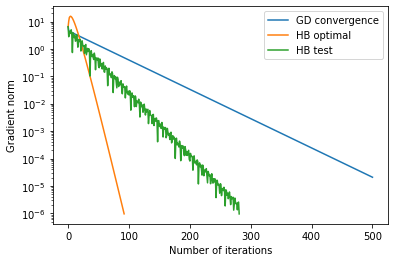

In [109]:
plt.semilogy([np.linalg.norm(grad(x)) for x in conv], label="GD convergence")
plt.semilogy([np.linalg.norm(grad(x)) for x in conv_opt_hb], label="HB optimal")
plt.semilogy([np.linalg.norm(grad(x)) for x in conv_test_hb], label="HB test")
plt.legend()
plt.xlabel("Number of iterations")
plt.ylabel("Gradient norm")

## Выводы

- Метод тяжёлого шарика - двухшаговый метод, который решает проблемы неизотропности линий уровня
- Метод предотвращает появление зигзагообразных траекторий
- Даже неоптимальные гиперпараметры приводят к более быстрой сходимости